In [1]:
import utils as Utils
from dqn_agent import DQN_Agent
from agent_handler import Agent_handler
from assignment3_utils import *
import numpy as np
import gym
import json


In [2]:
env = gym.make('MsPacman-v4', render_mode='rgb_array')

num_obs, num_actions = Utils.describe_env(env)

Observation space:  Box(0, 255, (210, 160, 3), uint8)
Observation space size:  (210, 160, 3)
Number of actions:  9


In [3]:
def get_params(batch, update):
  params = {
    "num_obs": (4, 86, 80),
    "num_actions": num_actions,
    "update_rate": update,
    "learning_rate": 0.1,
    "discount_factor": 0.95,
    "exploration_factor": 1,
    "min_exploration_rate": 0.05,
    "exploration_decay": 0.995,
    "batch_size": batch,
    "name": f'{batch}_{update}'
  }
  return params

In [4]:
agents = []

batchs = [8]
updates = [3]

for batch in batchs:
  for update in updates:
    agents.append(DQN_Agent(get_params(batch, update)))


In [5]:
handler = Agent_handler({
    "num_episodes":1,
    "max_steps":1,
    "notify_percent":1,
    "skip": 85,
    "checkpoint_interval": 200,
    "crop": {
      "top": 0,
      "bottom": -39,
      "left": 0,
      "right": -1,
  }
})

~~~ Training Agent: 1/1 ~~~
	Name	: DQN
	Start	: 12-06 23:24

	Episode	: 0/11 0%
Original Image Shape: (210, 160, 3)


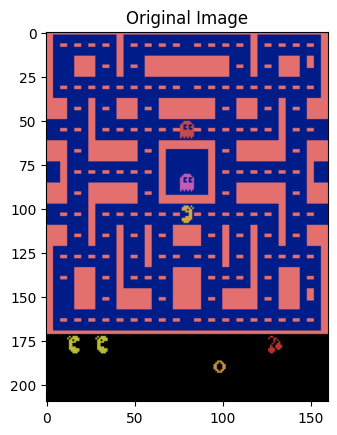

Cropped Image Shape: (171, 159, 3)


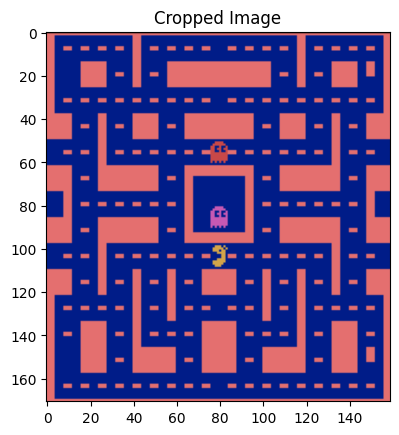

Downsampled Image Shape: (86, 80, 3)


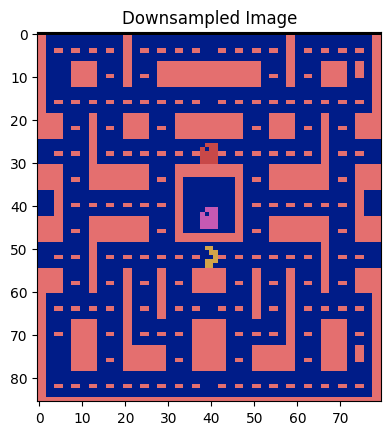

Grayscale Image Shape: (86, 80)


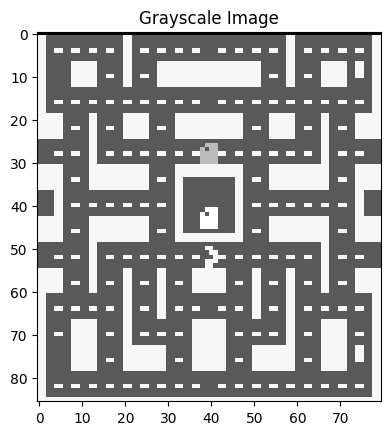

Normalized Image Shape: (86, 80)


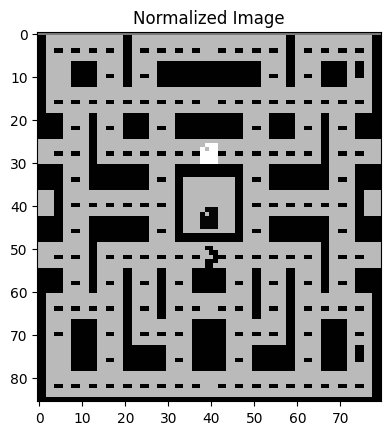

Original Image Shape: (210, 160, 3)


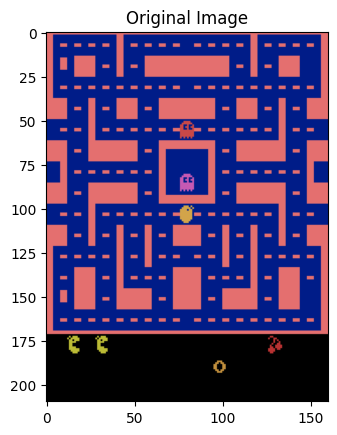

Cropped Image Shape: (171, 159, 3)


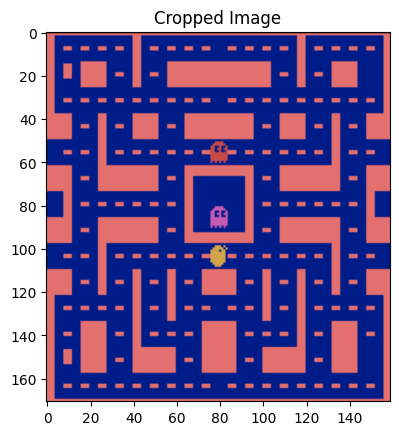

Downsampled Image Shape: (86, 80, 3)


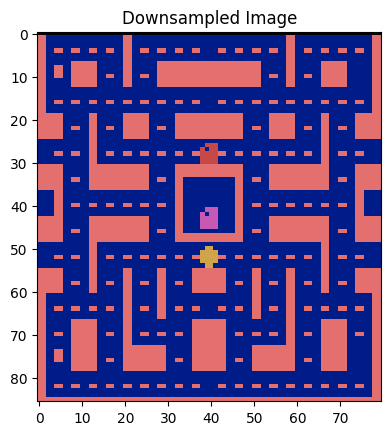

Grayscale Image Shape: (86, 80)


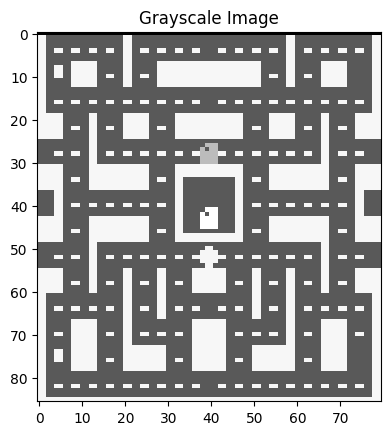

Normalized Image Shape: (86, 80)


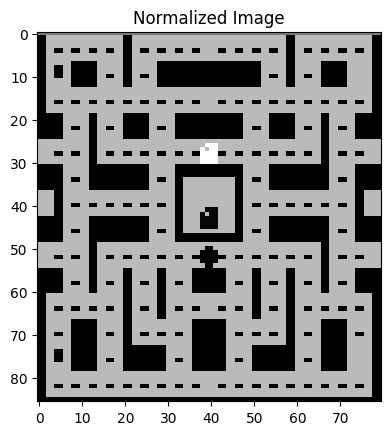

Original Image Shape: (210, 160, 3)


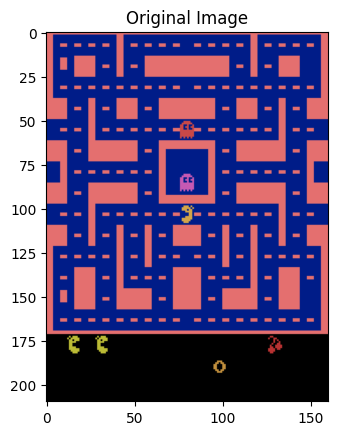

Cropped Image Shape: (171, 159, 3)


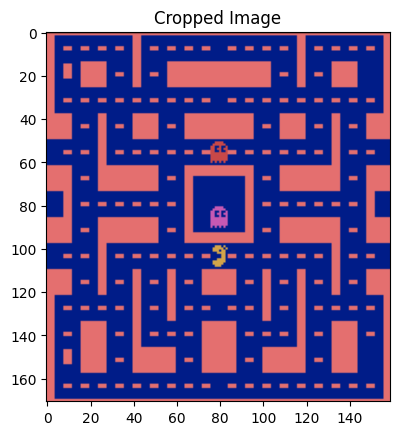

Downsampled Image Shape: (86, 80, 3)


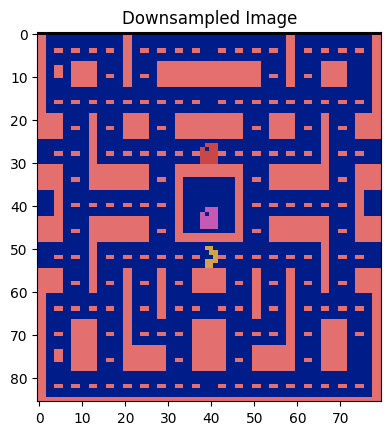

Grayscale Image Shape: (86, 80)


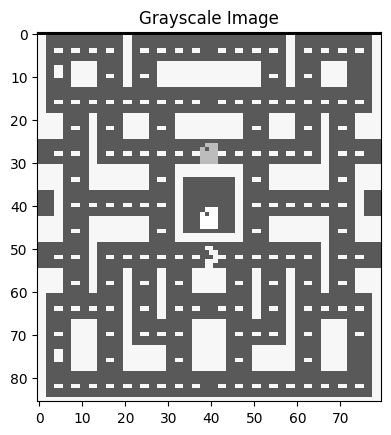

Normalized Image Shape: (86, 80)


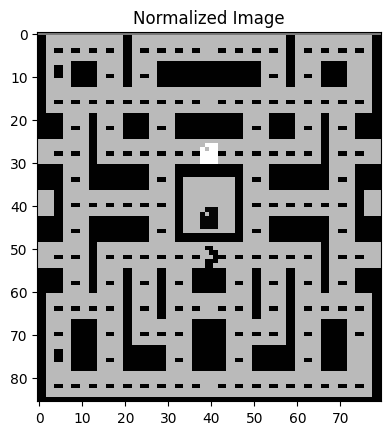

Original Image Shape: (210, 160, 3)


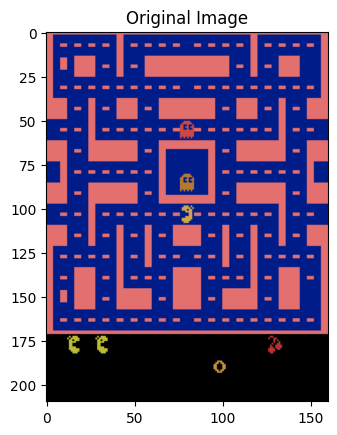

Cropped Image Shape: (171, 159, 3)


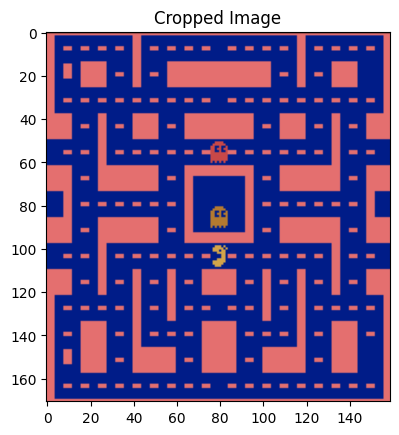

Downsampled Image Shape: (86, 80, 3)


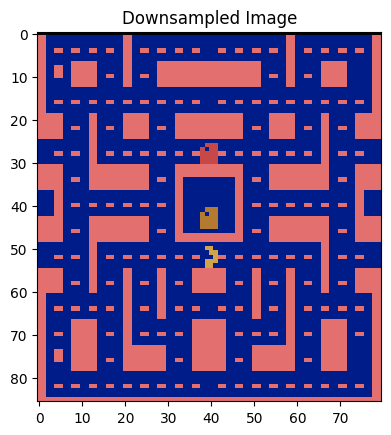

Grayscale Image Shape: (86, 80)


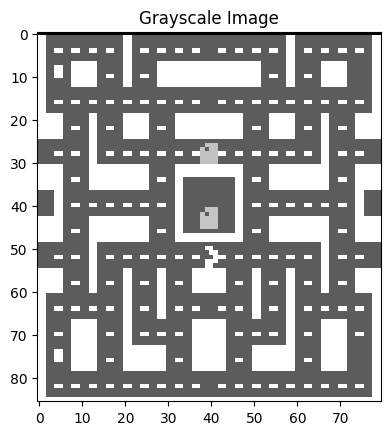

Normalized Image Shape: (86, 80)


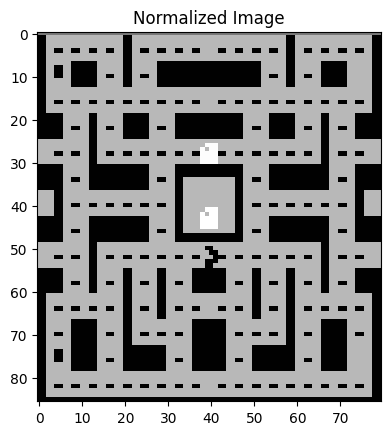

Original Image Shape: (210, 160, 3)


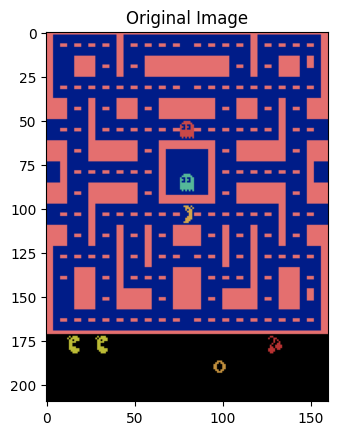

Cropped Image Shape: (171, 159, 3)


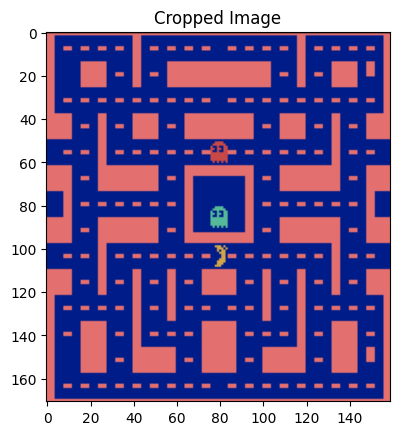

Downsampled Image Shape: (86, 80, 3)


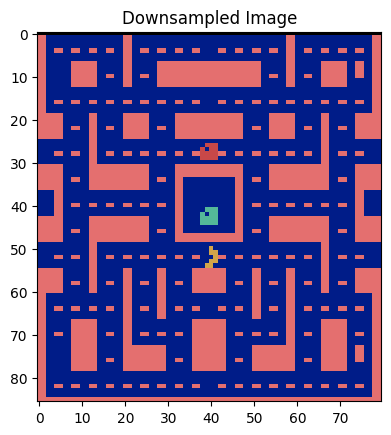

Grayscale Image Shape: (86, 80)


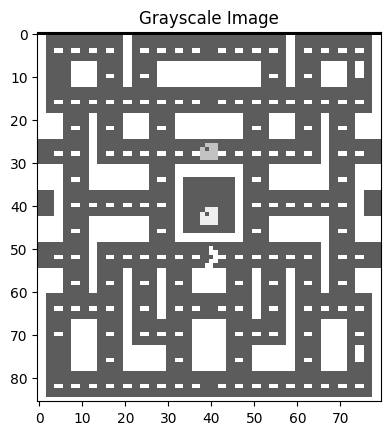

Normalized Image Shape: (86, 80)


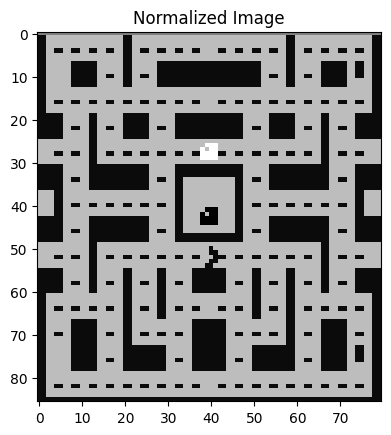

Original Image Shape: (210, 160, 3)


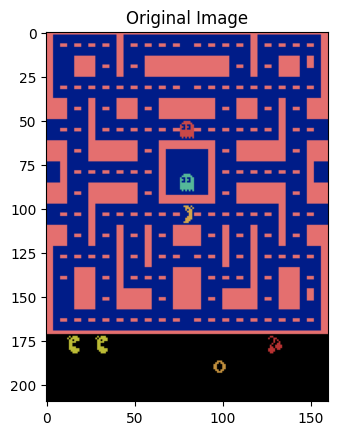

Cropped Image Shape: (171, 159, 3)


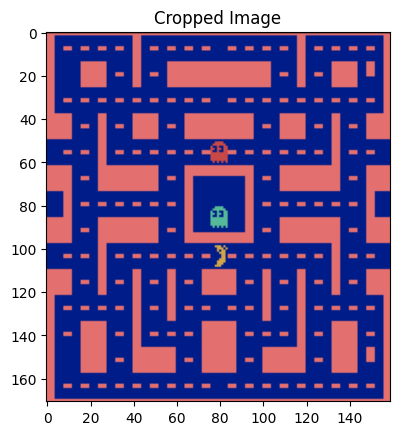

Downsampled Image Shape: (86, 80, 3)


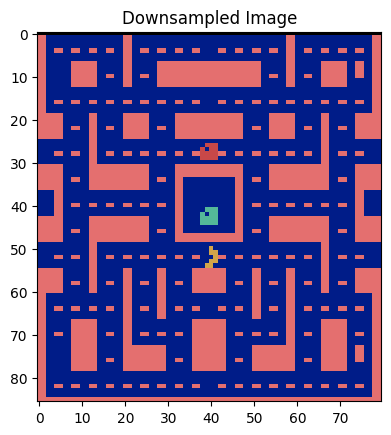

Grayscale Image Shape: (86, 80)


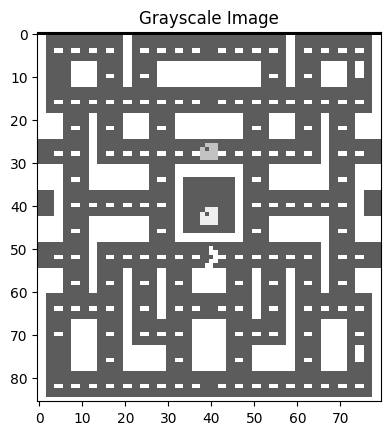

Normalized Image Shape: (86, 80)


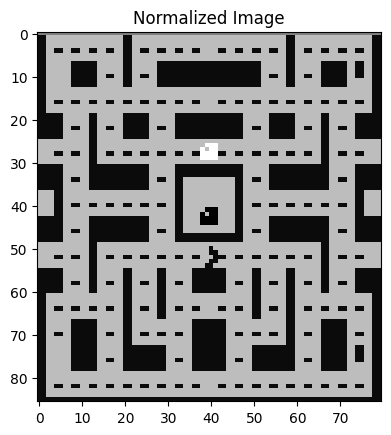

Original Image Shape: (210, 160, 3)


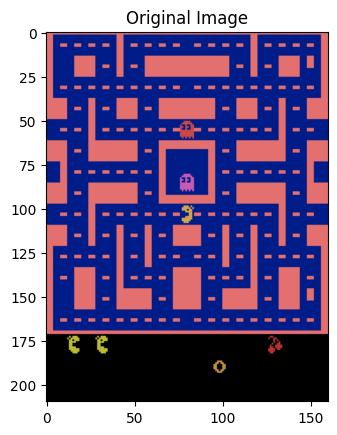

Cropped Image Shape: (171, 159, 3)


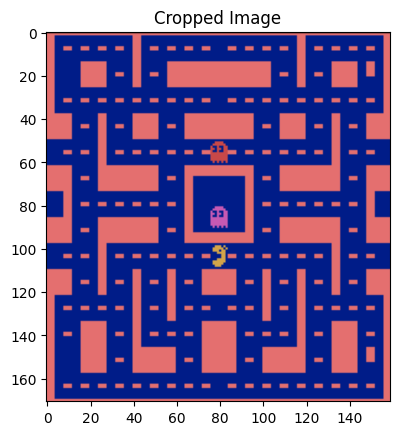

Downsampled Image Shape: (86, 80, 3)


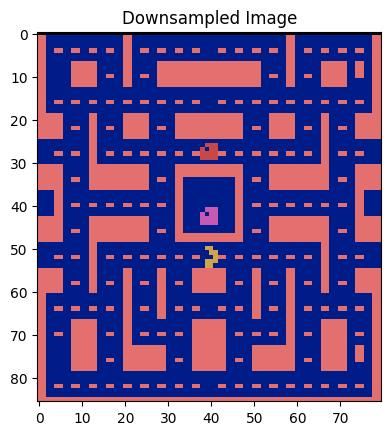

Grayscale Image Shape: (86, 80)


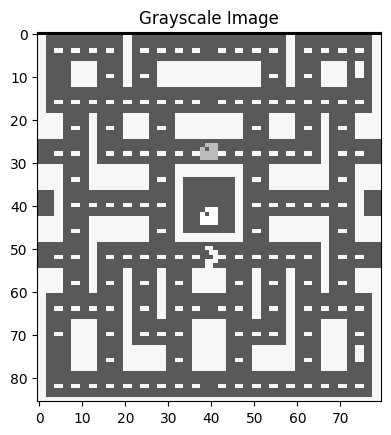

Normalized Image Shape: (86, 80)


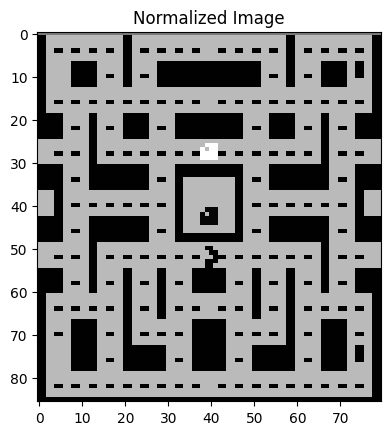

Original Image Shape: (210, 160, 3)


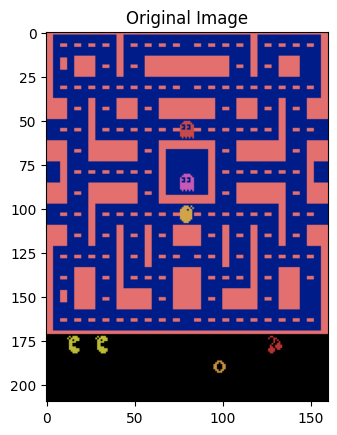

Cropped Image Shape: (171, 159, 3)


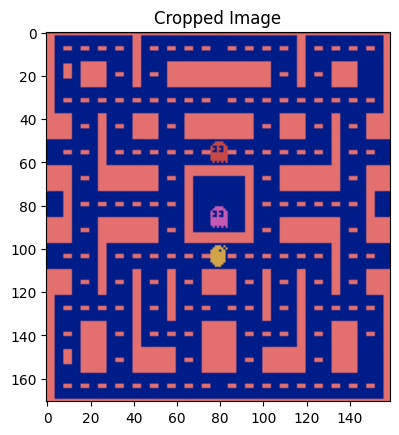

Downsampled Image Shape: (86, 80, 3)


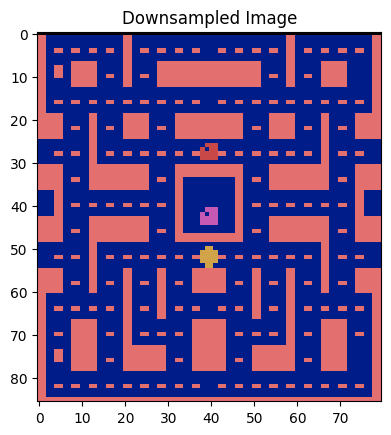

Grayscale Image Shape: (86, 80)


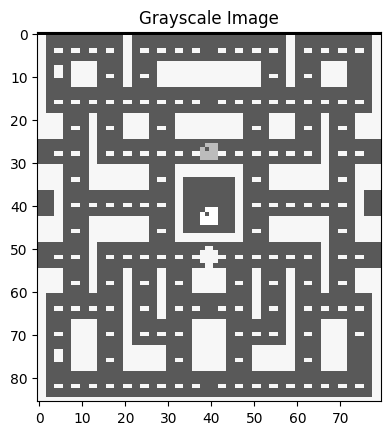

Normalized Image Shape: (86, 80)


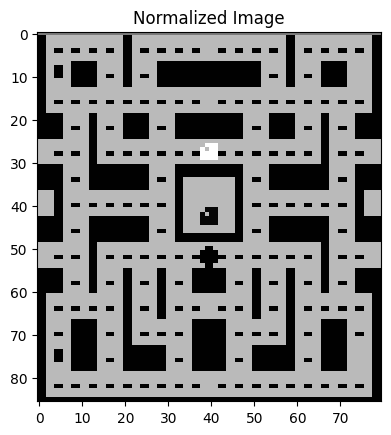

Original Image Shape: (210, 160, 3)


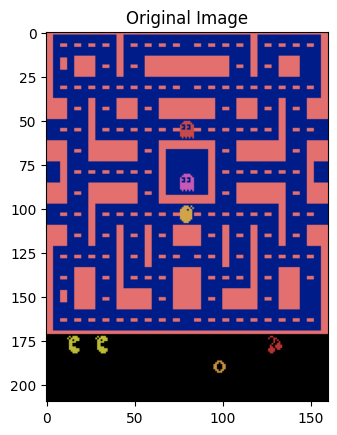

Cropped Image Shape: (171, 159, 3)


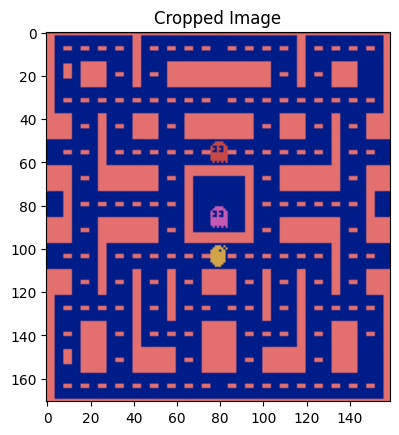

Downsampled Image Shape: (86, 80, 3)


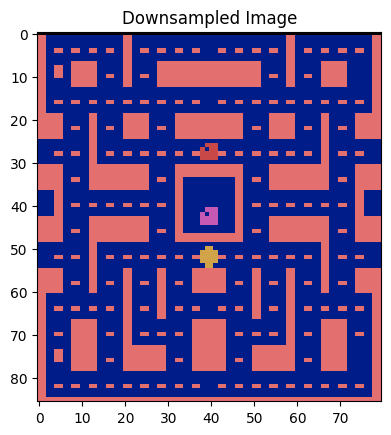

Grayscale Image Shape: (86, 80)


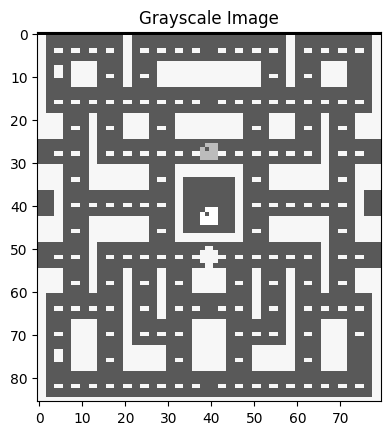

Normalized Image Shape: (86, 80)


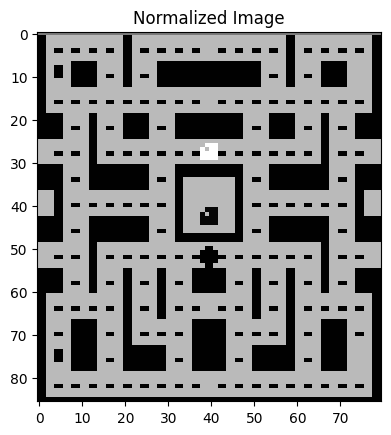

Original Image Shape: (210, 160, 3)


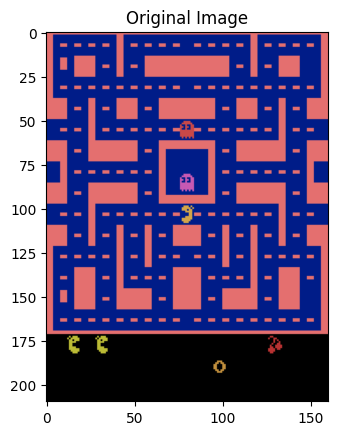

Cropped Image Shape: (171, 159, 3)


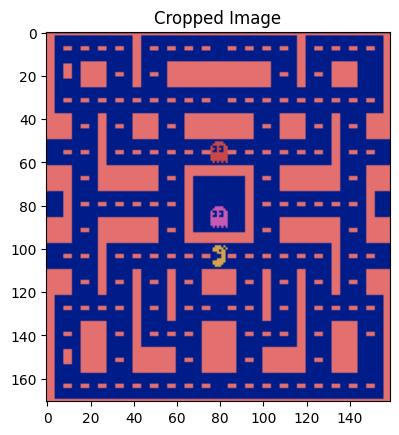

Downsampled Image Shape: (86, 80, 3)


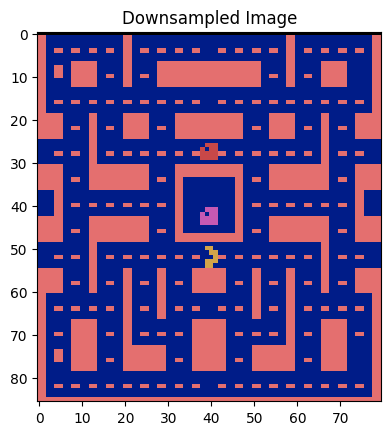

Grayscale Image Shape: (86, 80)


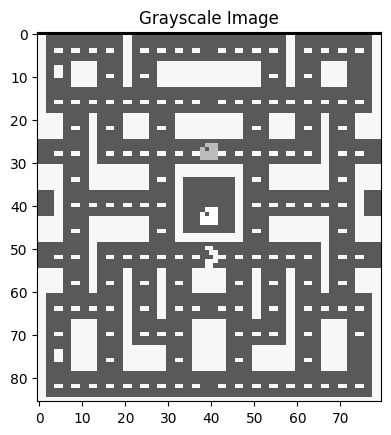

Normalized Image Shape: (86, 80)


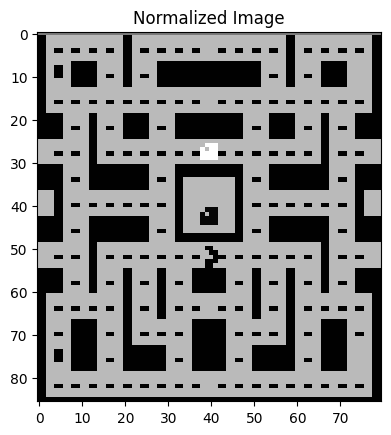

Original Image Shape: (210, 160, 3)


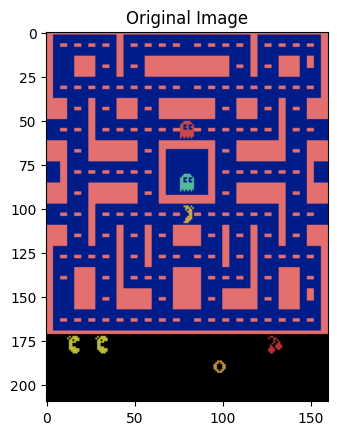

Cropped Image Shape: (171, 159, 3)


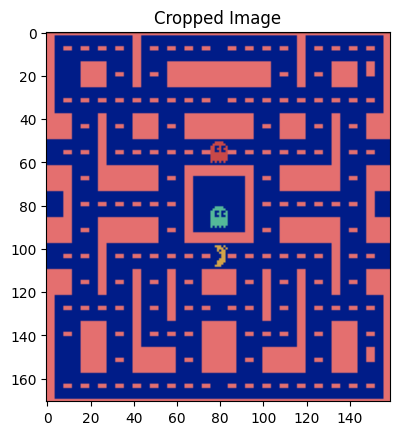

Downsampled Image Shape: (86, 80, 3)


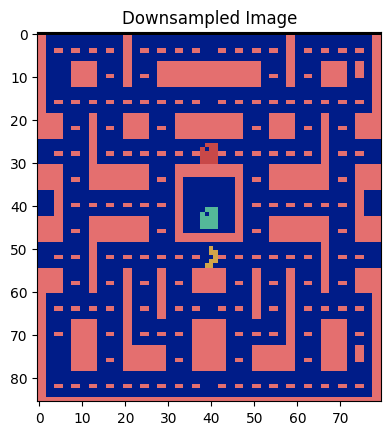

Grayscale Image Shape: (86, 80)


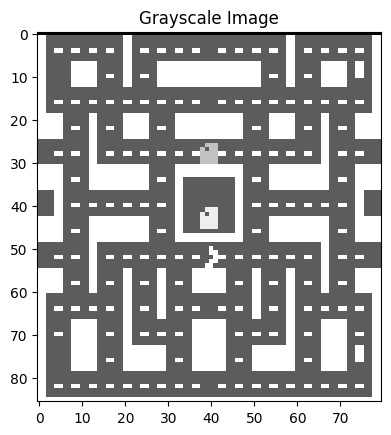

Normalized Image Shape: (86, 80)


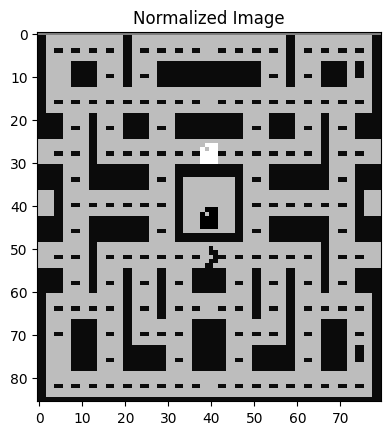

Original Image Shape: (210, 160, 3)


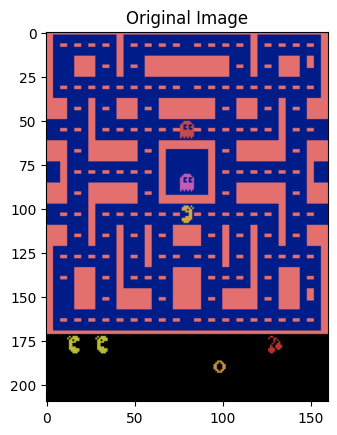

Cropped Image Shape: (171, 159, 3)


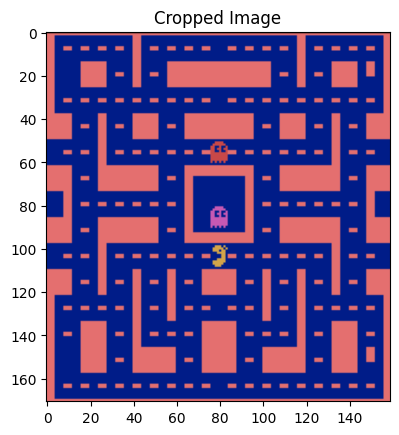

Downsampled Image Shape: (86, 80, 3)


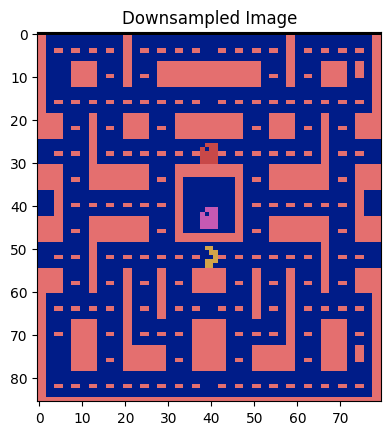

Grayscale Image Shape: (86, 80)


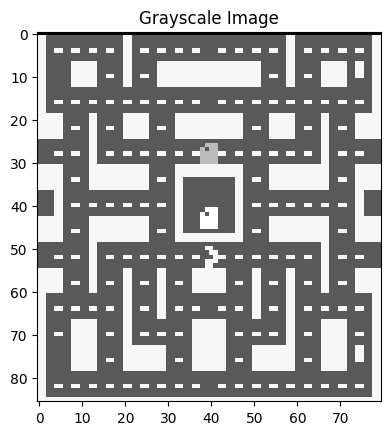

Normalized Image Shape: (86, 80)


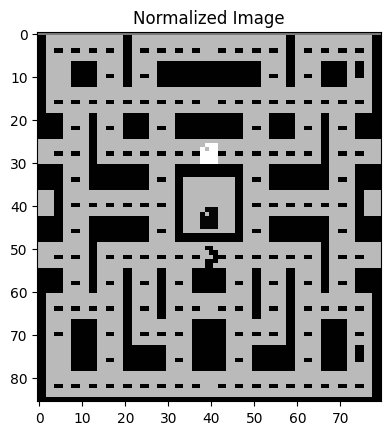

Original Image Shape: (210, 160, 3)


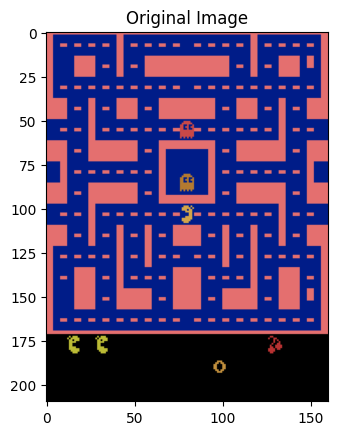

Cropped Image Shape: (171, 159, 3)


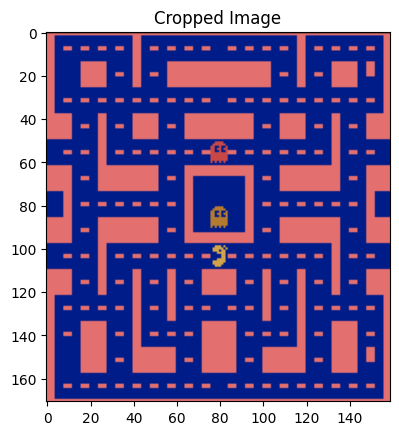

Downsampled Image Shape: (86, 80, 3)


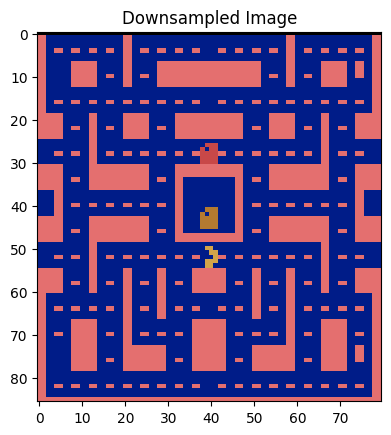

Grayscale Image Shape: (86, 80)


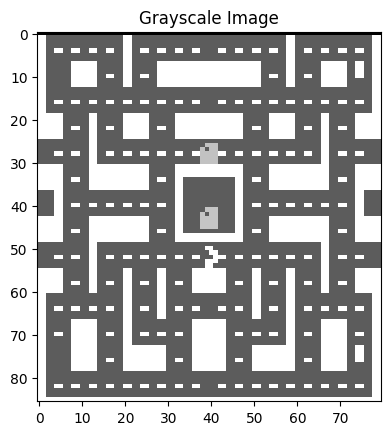

Normalized Image Shape: (86, 80)


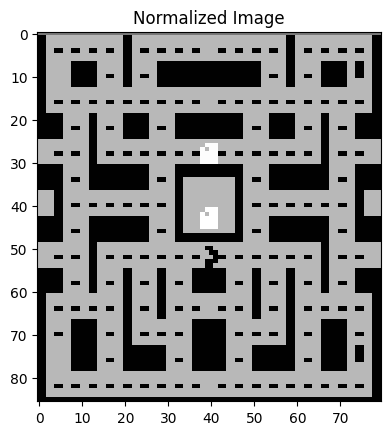

Original Image Shape: (210, 160, 3)


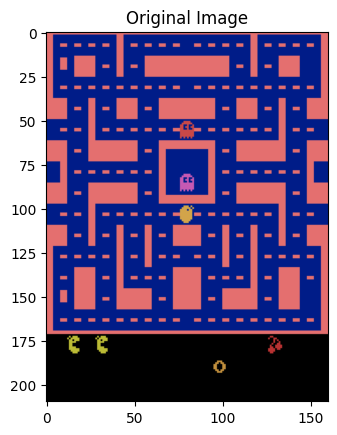

Cropped Image Shape: (171, 159, 3)


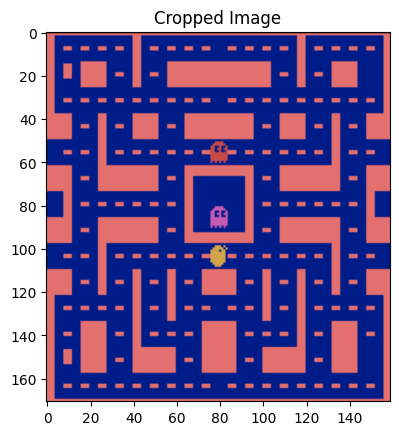

Downsampled Image Shape: (86, 80, 3)


KeyboardInterrupt: 

In [6]:
results = handler.train([agents[0]], env)

In [11]:
with open('results.json', 'r') as file:
    results = json.load(file)

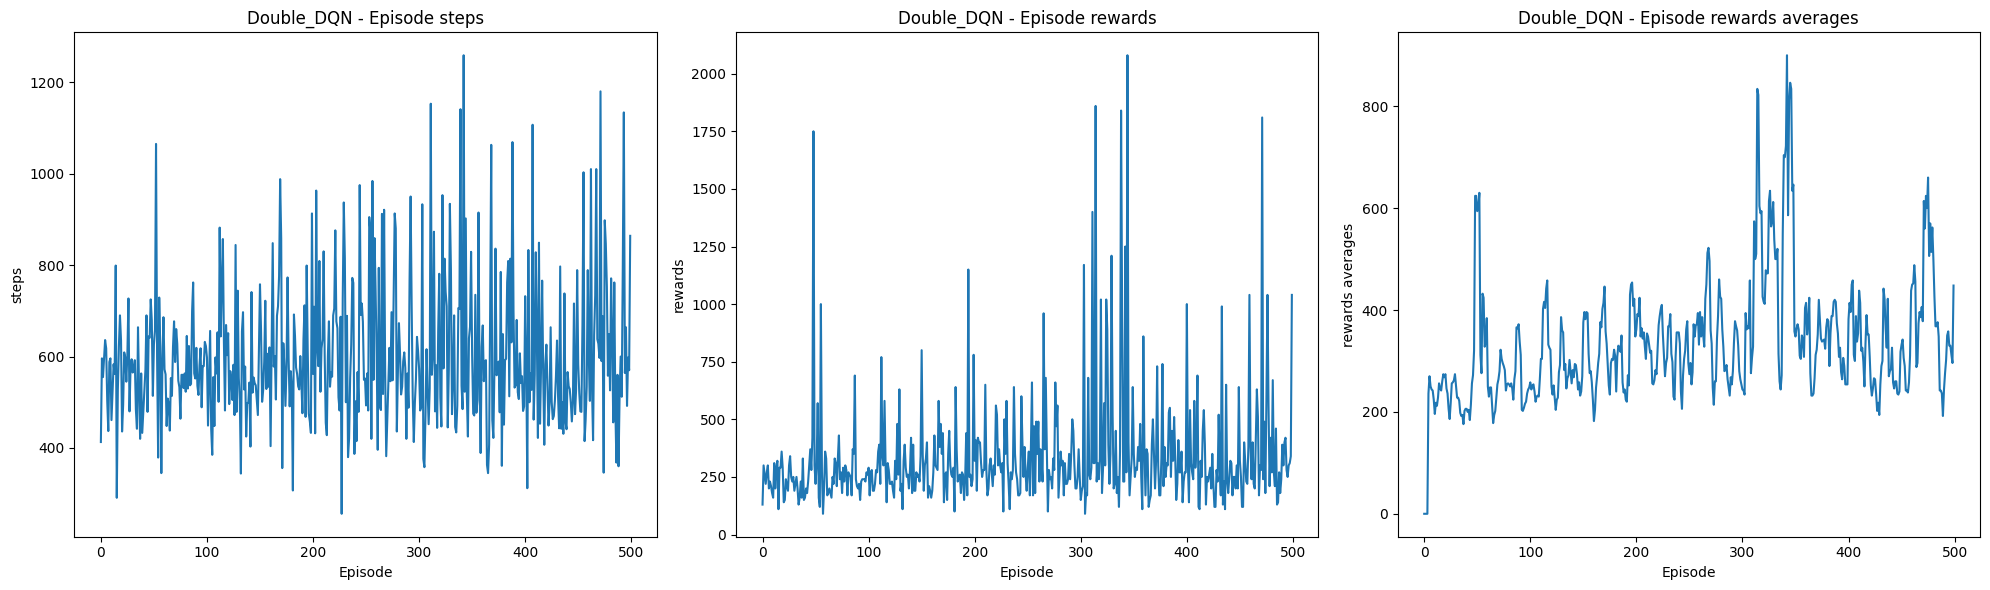

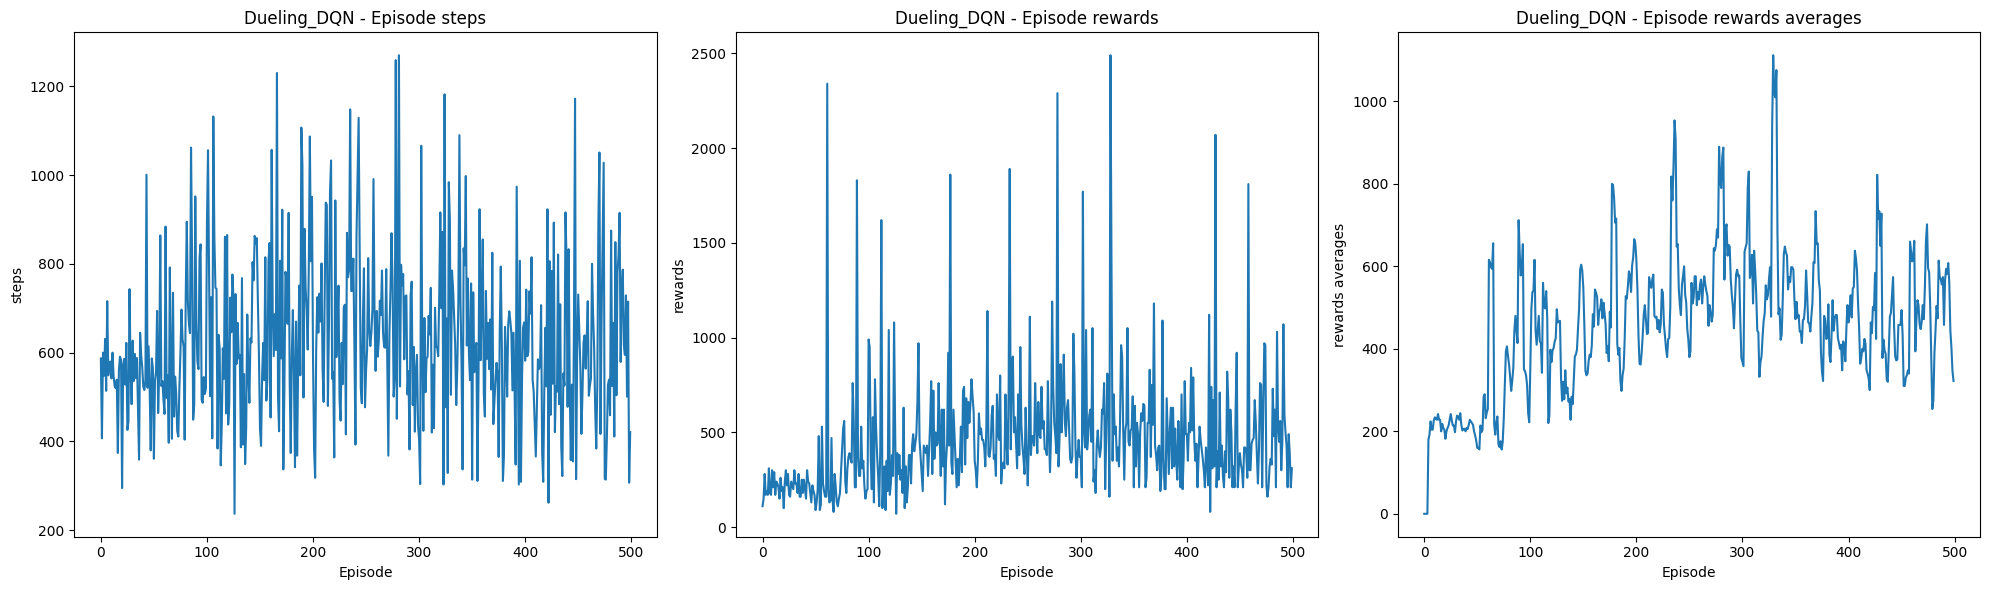

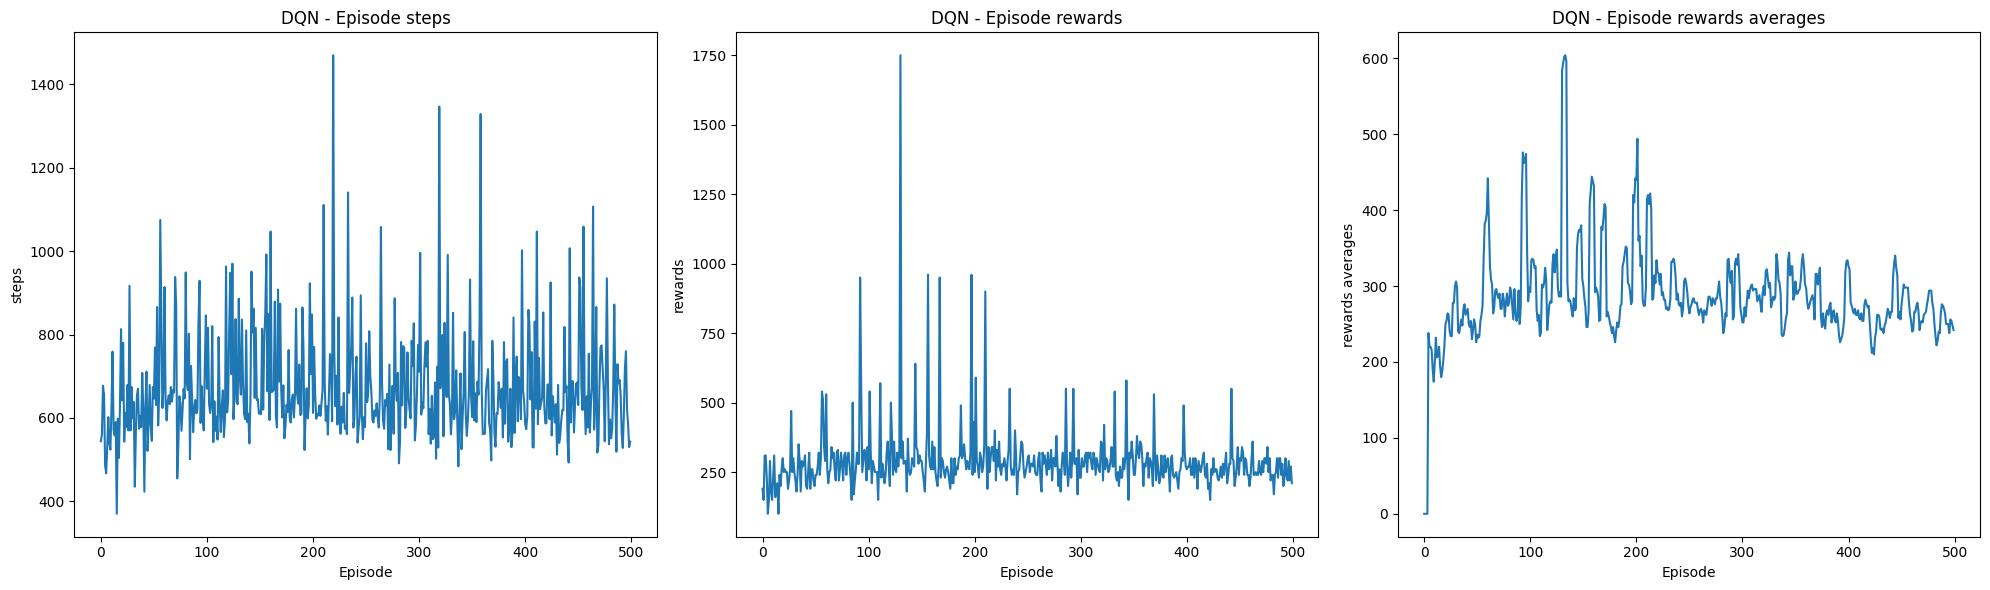

In [12]:
window_size = 5

for agent, result in results.items():
  moving_average = np.convolve(result["rewards"], np.ones(window_size)/window_size, mode='valid')

  padding = np.full(5 - 1, 0)
  result_array = np.concatenate([padding, moving_average])
  result["rewards averages"] = result_array
  Utils.plot_results(result, agent)